<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

**1. Загрузить датасет**

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
data.shape

(284807, 31)

In [4]:
data.isnull().sum() 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [5]:
print(data.Class[data.Class==0].count(), data.Class[data.Class==1].count())

284315 492


In [6]:
# Time - секунды  сначала месяца. Аггрегируем по дням.
data["Time_interval"] = data["Time"] // (360*24)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_interval
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


In [7]:
pivot = data.loc[:,["Class","Time_interval","Amount"]].pivot_table(index="Time_interval", columns="Class", values="Amount", aggfunc="sum").reset_index()
pivot.head()

Class,Time_interval,0,1
0,0.0,445284.77,843.93
1,1.0,223247.19,2056.73
2,2.0,270774.27,2491.88
3,3.0,1167951.14,3428.88
4,4.0,2220216.27,5890.94


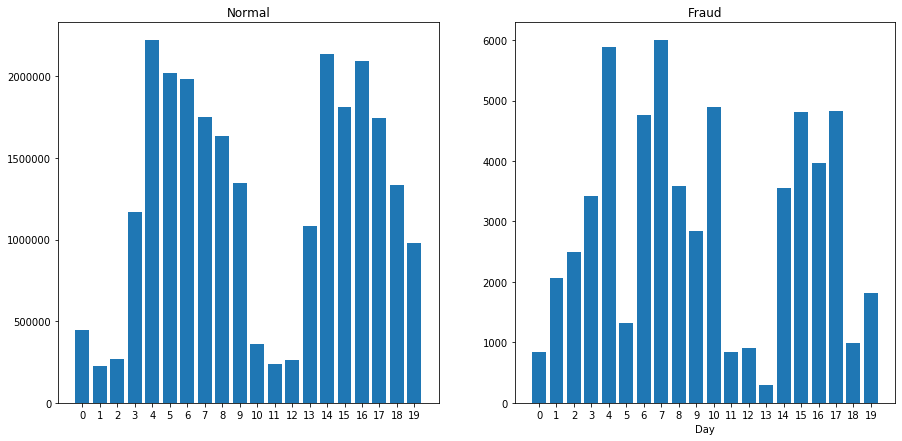

In [8]:
x = pivot["Time_interval"]
y1 = pivot[0]
y2 = pivot[1]

fig, axes = plt.subplots(nrows=1, ncols=2,sharex=True,figsize=(15,7))
ax = axes.flatten()
plt.xticks(np.arange(0, len(pivot), step=1))
plt.xlabel("Day")
ax[0].set_title("Normal")
ax[0].bar(x, y1)
ax[1].set_title("Fraud")
ax[1].bar(x, y2)

plt.show()

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [9]:
print(y1.sum(),y2.sum())

25102462.039999373 60127.97000000001


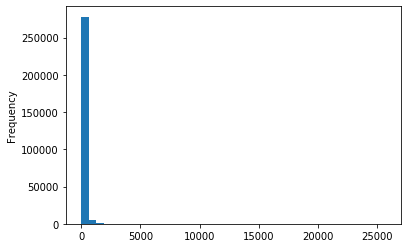

In [10]:
data[data["Class"] == 0]["Amount"].plot(kind="hist", bins=40)

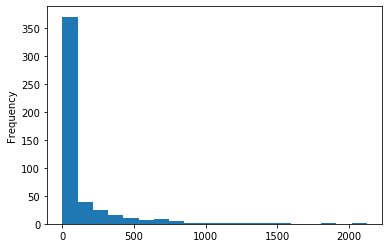

In [11]:
data[data["Class"] == 1]["Amount"].plot(kind="hist", bins=20)

**5. Построить графики histograms для всех значений**

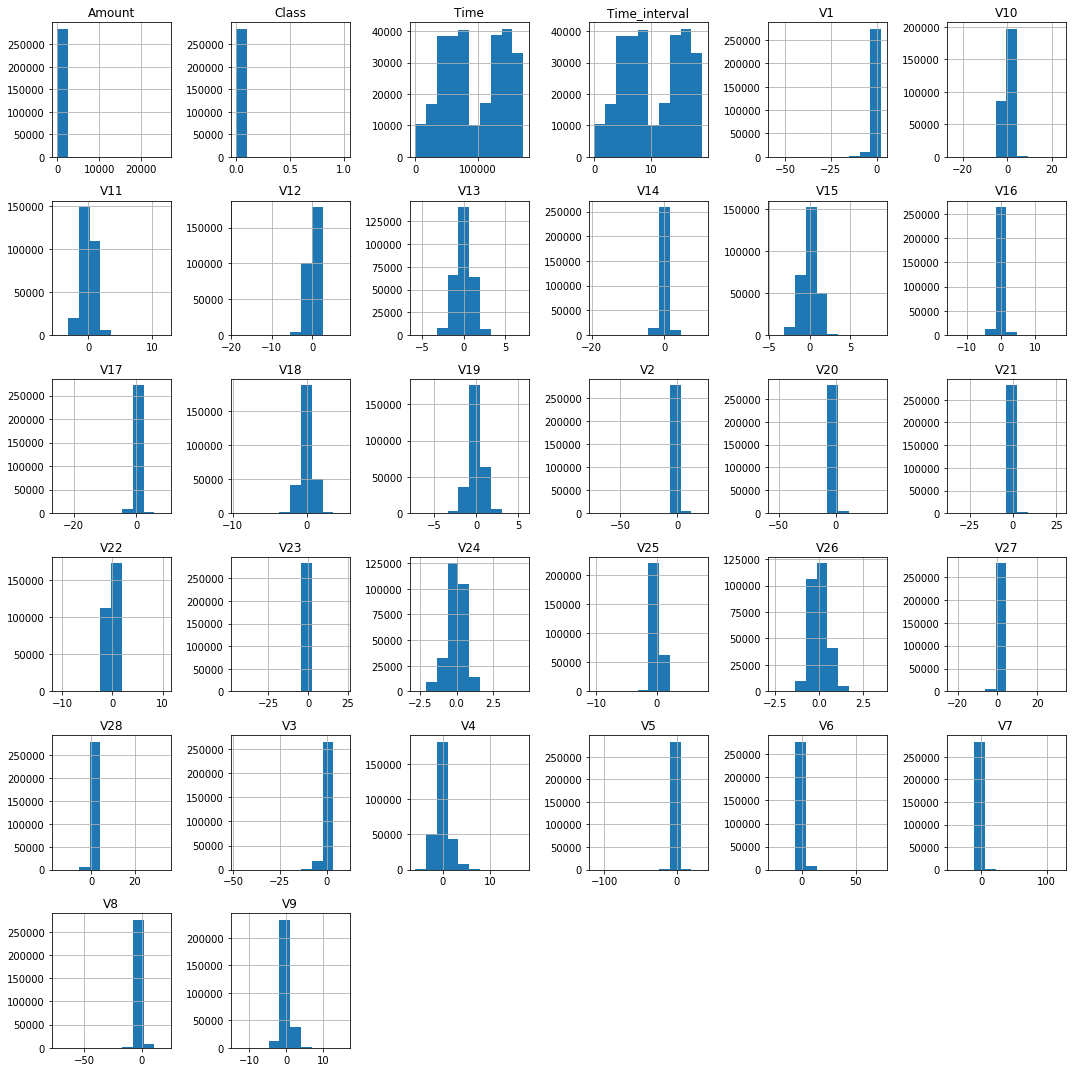

In [12]:
data.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

**6. Построить матрицу корреляций для всех значений**

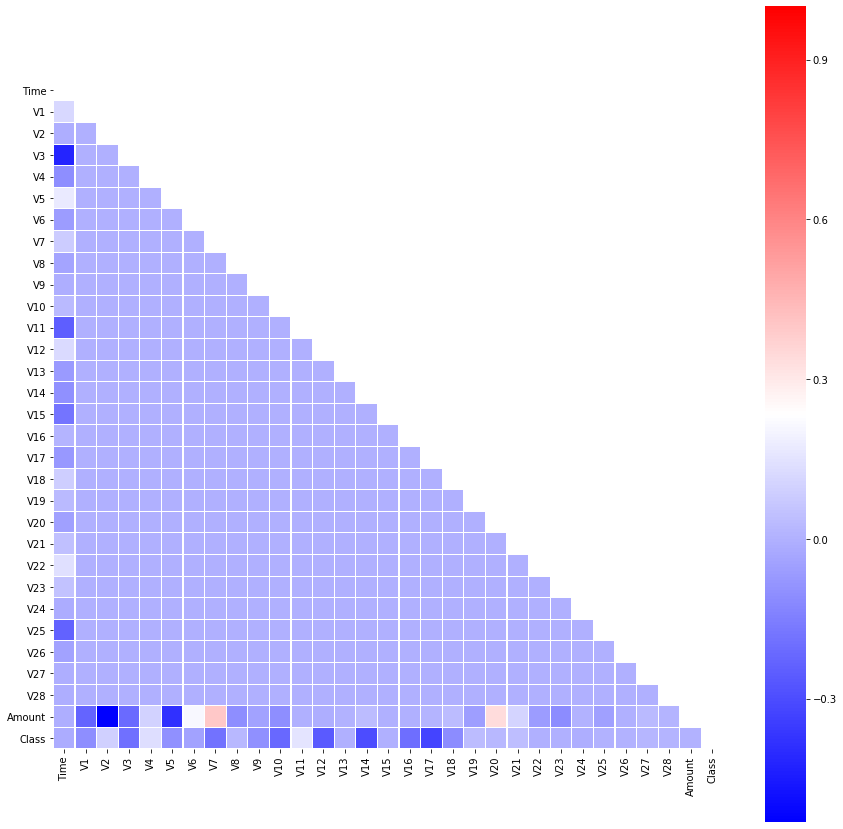

In [13]:
plt.figure(figsize = (15,15))

corr = data.loc[:,"Time":"Class"].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.tight_layout()

sns.heatmap(data=corr, mask=mask, annot=False, cmap='bwr', linewidths=.2, square=True)
plt.show()

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать логистическую регрессию. Сделать classification report. Нормализовать значения. Написать логистическую регрессию. Сделать classification report, сравнить с предыдущим report. Есть ли улучшения?**

In [14]:
from sklearn.model_selection import train_test_split
X = data.loc[:,"Time":"Amount"]
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 47
)

In [15]:
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)
model = LogisticRegression(solver="liblinear").fit(X_train, y_train)

In [16]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56872
           1       0.73      0.59      0.65        90

    accuracy                           1.00     56962
   macro avg       0.86      0.79      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [17]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

headers = list(data.columns.values)
np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = headers
df_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_interval
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0,-1.0


In [18]:
X = df_norm.loc[:,"Time":"Amount"]
y = df_norm["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)
model = LogisticRegression(solver="liblinear").fit(X_train, y_train)

model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     56872
         1.0       0.89      0.54      0.68        90

    accuracy                           1.00     56962
   macro avg       0.95      0.77      0.84     56962
weighted avg       1.00      1.00      1.00     56962



**8. Написать модель RandomForestClassifier на данный датасет и сравнить результаты с логистической регрессией. Почему результаты получились лучше (или хуже). Тренировочные и тестовые данные выбираем одинаковые (те же, что и для логистической регрессии), полученные на шаге 7.**

In [22]:
from sklearn.ensemble import RandomForestClassifier

No handles with labels found to put in legend.


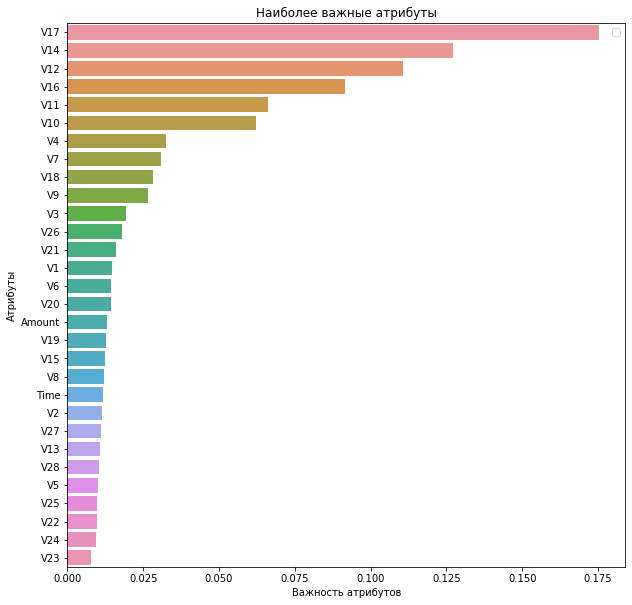

In [288]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [19]:
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))
model.score(X_test, y_test)

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     56872
         1.0       0.89      0.54      0.68        90

    accuracy                           1.00     56962
   macro avg       0.95      0.77      0.84     56962
weighted avg       1.00      1.00      1.00     56962



0.9991748885221726

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные). Написать логистическую регрессию на сгенерированные данные и сравнить результат с моделями, полученными на шаге 7 и 8. В качестве тестовых данных используем один и тот же датасет, полученный на шаге 7.**

In [20]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print('Количество элементов до операции:', len(X_train))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 227845
Количество элементов после операции: 454886


In [21]:
# X = df_norm.loc[:,"Time":"Amount"]
# y = df_norm["Class"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)
model = LogisticRegression(solver="liblinear").fit(X_resampled, y_resampled)

model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

        -1.0       1.00      0.98      0.99     56872
         1.0       0.06      0.92      0.11        90

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



No handles with labels found to put in legend.


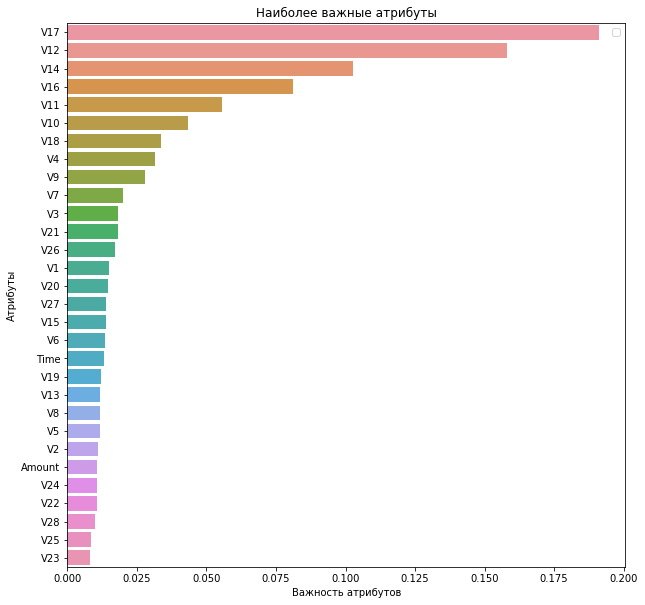

In [23]:
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train,y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [24]:
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))
model.score(X_test, y_test)

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     56872
         1.0       0.97      0.80      0.88        90

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



0.9996488887328394

# Задание для интересующихся time-series (временными рядами)

Есть датасет потребления электроэнергии.

In [ ]:
import pandas as pd
url="http://yustiks.ru/dataset/household_power_consumption.txt"

In [4]:
df = pd.read_csv(url, sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [5]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
# Хороший пример для LSTM модели можно найти здес